In [1]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy, Pandas and Matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import openCv and os
import cv2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Include data
folders = "/content/drive/MyDrive/data"
categories = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
data = []
img_size = 120
for category in categories:
  dir = os.path.join(folders, category)
  class_sound = int(category)
  print(class_sound)
  for img in os.listdir(dir):
    img_matrix = cv2.imread(os.path.join(dir,img), cv2.IMREAD_COLOR)
    new_img = cv2.resize(img_matrix, (img_size, img_size))  # resize to normalize data size
    data.append([new_img, class_sound])

0
1
2
3
4
5
6
7
8
9


In [4]:
# shuffle the data.
import random
random.shuffle(data)
for sample in data[:3]:
    print(sample[1])   

2
6
2


In [5]:
X = []
y = []
for features, label in data:
    X.append(features)
    y.append(label)

In [6]:
from sklearn.model_selection import train_test_split

X = np.array(X)
y = np.array(y)

# First, create X_train, y_train and X_temporary and y_temporary datasets from X and y.
X_train, X_temporary, y_train, y_temporary = train_test_split(X, y, train_size=0.8)

# Using the X_temporary and y_temporary dataset we just created create validaiton and test datasets.
X_val, X_test, y_val, y_test = train_test_split(X_temporary, y_temporary, train_size=0.5)

In [7]:
# Divide each dataset by 255
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

In [8]:
# Create a model object
model = tf.keras.Sequential()   

In [9]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(120, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(120, 120, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [10]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(240, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(120, 120, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(240, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(120, 120, 3)))  
 


In [11]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten()) 

In [12]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(240, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(240, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(240, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the output layer
model.add(tf.keras.layers.Dense(10,activation="softmax"))
    
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
# Train the model for 16 epochs with batch size of 160
results = model.fit(X_train, y_train, batch_size = 160, epochs=16, validation_data=(X_val, y_val))      
        

Epoch 1/16
44/44 [==============================] - 26s 406ms/step - loss: 2.1816 - accuracy: 0.2120 - val_loss: 1.7041 - val_accuracy: 0.3666
Epoch 2/16
44/44 [==============================] - 14s 319ms/step - loss: 1.6608 - accuracy: 0.3853 - val_loss: 1.2789 - val_accuracy: 0.6163
Epoch 3/16
44/44 [==============================] - 14s 321ms/step - loss: 1.2866 - accuracy: 0.5588 - val_loss: 0.9691 - val_accuracy: 0.6804
Epoch 4/16
44/44 [==============================] - 14s 323ms/step - loss: 1.0204 - accuracy: 0.6553 - val_loss: 0.8190 - val_accuracy: 0.7434
Epoch 5/16
44/44 [==============================] - 14s 325ms/step - loss: 0.8105 - accuracy: 0.7297 - val_loss: 0.7177 - val_accuracy: 0.7698
Epoch 6/16
44/44 [==============================] - 14s 326ms/step - loss: 0.6938 - accuracy: 0.7761 - val_loss: 0.6830 - val_accuracy: 0.7984
Epoch 7/16
44/44 [==============================] - 14s 327ms/step - loss: 0.5557 - accuracy: 0.8218 - val_loss: 0.5752 - val_accuracy: 0.8373

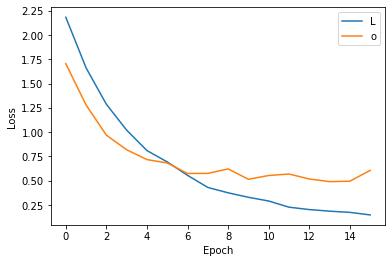

In [14]:
# Plot the the training loss
plt.plot(results.history["loss"], label = "loss")
# Plot the the validation loss
plt.plot(results.history["val_loss"], label = "val_loss")
# Name the x and y axises
plt.ylabel("Loss")
plt.xlabel("Epoch")
# Put legend table
plt.legend("Loss")
# Show the plot
plt.show()


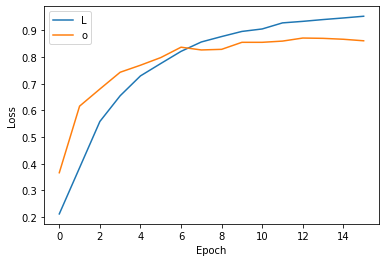

In [15]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label = "accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label = "val_accuracy")

# Name the x and y axises
plt.ylabel("Loss")
plt.xlabel("Epoch")

# Put legend table
plt.legend("Loss")

# Show the plot
plt.show()


In [16]:
# Evaluate the performance
model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 35ms/step - loss: 0.6064 - accuracy: 0.8730


[0.6064265966415405, 0.8729977011680603]

In [18]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[777].reshape(1,120,120,3))

# Print the prediction result
prediction_result

array([[3.7291145e-13, 2.4900247e-11, 1.4858629e-12, 2.5588642e-08,
        4.9573567e-10, 1.8085002e-13, 1.0000000e+00, 2.1982219e-12,
        8.8445934e-14, 3.0606904e-12]], dtype=float32)

In [19]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [20]:
# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

This image belongs to class 6 with 1.0 probability %
